## Importing libraries

In [1]:
#importing warnings library
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing required libraries
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading and Cleaning data

In [3]:
#loading mapping data into mapping dataframe
mapping = pd.read_csv("mapping.csv")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [4]:
#understanding data and columns in the dataframe
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 51.1+ KB


In [5]:
#loading rounds2 data into rounds2 dataframe
rounds2 = pd.read_csv("rounds2.csv",encoding='ANSI', engine='python')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
#understanding data and columns in the dataframe
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 3.1+ MB


In [7]:
#number of unique companies in rounds2
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x: x.lower().strip())
rounds2['company_permalink'].describe()

count                       114949
unique                       66368
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [8]:
#Finding missing data in rounds2 dataframe
print(rounds2.isnull().sum())

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64


In [9]:
#Finding % of missing data in rounds2 dataframe
round(100*(rounds2.isnull().sum()/len(rounds2.index)),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [10]:
#dropping columns with more than 30% missing values and finding the new % of missing data
rounds2 = rounds2.drop('funding_round_code',axis=1)
round(100*(rounds2.isnull().sum()/len(rounds2.index)),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [11]:
#Dropping the rows with missing values in column 'raised_amount_usd'
rounds2 = rounds2[~np.isnan(rounds2['raised_amount_usd'])]

In [12]:
print(rounds2.isnull().sum())

company_permalink          0
funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
dtype: int64


In [13]:
#Checking the data types to its correct and acceptable form
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94959 entries, 0 to 114948
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        94959 non-null  object 
 1   funding_round_permalink  94959 non-null  object 
 2   funding_round_type       94959 non-null  object 
 3   funded_at                94959 non-null  object 
 4   raised_amount_usd        94959 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.9+ MB


In [14]:
#Changing the data type for column 'funded_at' to date-time format
rounds2['funded_at'] = rounds2['funded_at'].astype('datetime64')

In [15]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94959 entries, 0 to 114948
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   company_permalink        94959 non-null  object        
 1   funding_round_permalink  94959 non-null  object        
 2   funding_round_type       94959 non-null  object        
 3   funded_at                94959 non-null  datetime64[ns]
 4   raised_amount_usd        94959 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 3.3+ MB


In [16]:
#loading companies data into companies dataframe
companies = pd.read_csv("companies.csv",encoding='ANSI', engine='python')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [17]:
#understanding data and columns in the dataframe
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 2.5+ MB


In [18]:
#number of unique companies in companies
companies['permalink'] = companies['permalink'].apply(lambda x: x.lower().strip())
companies['permalink'].describe()

count                             66368
unique                            66368
top       /organization/keystone-dental
freq                                  1
Name: permalink, dtype: object

In [19]:
#Finding missing data in companies dataframe
print(companies.isnull().sum())

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64


In [20]:
#Finding % of missing data in companies dataframe
round(100*(companies.isnull().sum()/len(companies.index)),2)

permalink         0.00
name              0.00
homepage_url      7.62
category_list     4.74
status            0.00
country_code     10.48
state_code       12.88
region           12.10
city             12.10
founded_at       22.93
dtype: float64

In [21]:
#Dropping insignificant columns in terms of current analysis 
companies = companies.drop('state_code',axis=1)
companies = companies.drop('region',axis=1)
companies = companies.drop('city',axis=1)
companies = companies.drop('founded_at',axis=1)

In [22]:
#Checking count and % of missing values after dropping the columns
print(companies.isnull().sum())

permalink           0
name                1
homepage_url     5058
category_list    3148
status              0
country_code     6958
dtype: int64


In [23]:
round(100*(companies.isnull().sum()/len(companies.index)),2)

permalink         0.00
name              0.00
homepage_url      7.62
category_list     4.74
status            0.00
country_code     10.48
dtype: float64

In [24]:
#Dropping rows with missing values for 'country_code'
companies = companies[~(companies['country_code'].isnull())]

In [25]:
round(100*(companies.isnull().sum()/len(companies.index)),2)

permalink        0.00
name             0.00
homepage_url     6.15
category_list    2.70
status           0.00
country_code     0.00
dtype: float64

In [26]:
#ignoring these missing values as these would not effect the analysis

## Renaming columns and Merging the two Data Frames 'companies' and 'rounds2'

In [27]:
#rename column 'company_permalink' to 'permalink' in Dataframe 'rounds2'
rounds2.rename(columns = {"company_permalink": "permalink"}, inplace = True)
rounds2.head()

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,2015-05-01,10000000.0
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,2014-01-03,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,2014-01-30,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2008-03-19,2000000.0
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,2014-01-07,41250.0


In [28]:
#Merging the two data frames 'companies' and 'rounds2'
master_frame = pd.merge(companies, rounds2, how='inner', on='permalink')
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,2015-05-01,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,2014-01-03,700000.0
2,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2008-03-19,2000000.0
3,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,2014-01-07,41250.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,2009-11-09,43360.0


In [29]:
#How many observations are present in master_frame
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89108 entries, 0 to 89107
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   permalink                89108 non-null  object        
 1   name                     89107 non-null  object        
 2   homepage_url             85730 non-null  object        
 3   category_list            88529 non-null  object        
 4   status                   89108 non-null  object        
 5   country_code             89108 non-null  object        
 6   funding_round_permalink  89108 non-null  object        
 7   funding_round_type       89108 non-null  object        
 8   funded_at                89108 non-null  datetime64[ns]
 9   raised_amount_usd        89108 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 4.8+ MB


## Analysing the data

In [30]:
#Representative funding amount of venture type
df = master_frame[master_frame['funding_round_type']=='venture']
df['raised_amount_usd'].median()

5000000.0

In [31]:
#Representative funding amount of angel type
df1 = master_frame[master_frame['funding_round_type']=='angel']
df1['raised_amount_usd'].median()

410737.0

In [32]:
#Representative funding amount of seed type
df2 = master_frame[master_frame['funding_round_type']=='seed']
df2['raised_amount_usd'].median()

300000.0

In [33]:
#Representative funding amount of private_equity type
df3 = master_frame[master_frame['funding_round_type']=='private_equity']
df3['raised_amount_usd'].median()

20000000.0

In [34]:
#Plot to understand the most invested funding type
most_invt_fund_type = master_frame['funding_round_type'].value_counts()
most_invt_fund = most_invt_fund_type.to_frame()
most_invt_fund.reset_index(level=0, inplace=True)
most_invt_fund.rename(columns = {"funding_round_type": "investment_count", "index": "funding_type"}, inplace = True)
most_invt_fund.head()

,funding_type,investment_count
0,venture,48111
1,seed,21233
2,debt_financing,6533
3,angel,4427
4,grant,1979


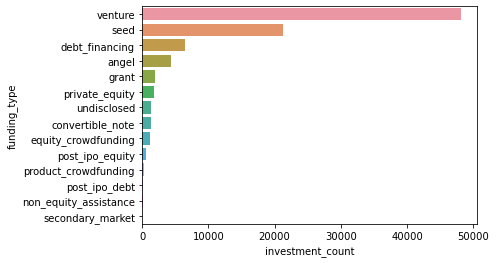

In [35]:
sns.barplot(data=most_invt_fund, x='investment_count', y='funding_type')
plt.show()

In [36]:
#understanding data and columns in the dataframe for 'venture' type of funding
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48111 entries, 0 to 89102
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   permalink                48111 non-null  object        
 1   name                     48111 non-null  object        
 2   homepage_url             45936 non-null  object        
 3   category_list            47809 non-null  object        
 4   status                   48111 non-null  object        
 5   country_code             48111 non-null  object        
 6   funding_round_permalink  48111 non-null  object        
 7   funding_round_type       48111 non-null  object        
 8   funded_at                48111 non-null  datetime64[ns]
 9   raised_amount_usd        48111 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 2.6+ MB


In [37]:
#finding total investment amount for countries
tot_invst = df.pivot_table(values='raised_amount_usd', index='country_code', aggfunc='sum')

In [38]:
#data frame named top9 with the top nine countries (based on the total investment amount each country has received)
top9 = tot_invst.sort_values(by='raised_amount_usd', ascending=False).head(9)
top9

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
FRA,7.259537e+09
ISR,6.907515e+09
DEU,6.346960e+09
JPN,3.363677e+09


## Working on 'mapping' data frame and merging with the master dataframe

In [39]:
# Creating new column 'main_sector' to get the main sector from the 8 sectors

In [40]:
#rename column 'category_list' to 'primary_sector' in Dataframe 'mapping'
mapping.rename(columns = {"category_list": "primary_sector"}, inplace = True)
mapping.head()

,primary_sector,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [41]:
#Replacing 0 with NaN in all the columns in mapping data frame
mapping['Automotive & Sports'] = mapping['Automotive & Sports'].apply(lambda x: str(x).replace('0', 'NaN'))
mapping['Blanks'] = mapping['Blanks'].apply(lambda x: str(x).replace('0', 'NaN'))
mapping['Cleantech / Semiconductors'] = mapping['Cleantech / Semiconductors'].apply(lambda x: str(x).replace('0', 'NaN'))
mapping['Entertainment'] = mapping['Entertainment'].apply(lambda x: str(x).replace('0', 'NaN'))
mapping['Health'] = mapping['Health'].apply(lambda x: str(x).replace('0', 'NaN'))
mapping['Manufacturing'] = mapping['Manufacturing'].apply(lambda x: str(x).replace('0', 'NaN'))
mapping['News, Search and Messaging'] = mapping['News, Search and Messaging'].apply(lambda x: str(x).replace('0', 'NaN'))
mapping['Others'] = mapping['Others'].apply(lambda x: str(x).replace('0', 'NaN'))
mapping['Social, Finance, Analytics, Advertising'] = mapping['Social, Finance, Analytics, Advertising'].apply(lambda x: str(x).replace('0', 'NaN'))

In [42]:
#Changing all the columns datatype to float
mapping['Automotive & Sports'] = mapping['Automotive & Sports'].astype('float64')
mapping['Blanks'] = mapping['Blanks'].astype('float64')
mapping['Cleantech / Semiconductors'] =  mapping['Cleantech / Semiconductors'].astype('float64')
mapping['Entertainment'] = mapping['Entertainment'].astype('float64')
mapping['Health'] = mapping['Health'].astype('float64')
mapping['Manufacturing'] = mapping['Manufacturing'].astype('float64')
mapping['News, Search and Messaging'] = mapping['News, Search and Messaging'].astype('float64')
mapping['Others'] = mapping['Others'].astype('float64')
mapping['Social, Finance, Analytics, Advertising'] = mapping['Social, Finance, Analytics, Advertising'].astype('float64')

In [43]:
#Creating new column 'main_sector' from the multiple sector columns
mapp = (mapping.set_index(['primary_sector']).stack().reorder_levels([1,0]).reset_index(name='a').drop('a', 1).rename(columns={'level_0':'main_sector'}))
mapp.head(10)

,main_sector,primary_sector
0,Blanks,NaN
1,Manufacturing,3D
2,Manufacturing,3D Printing
3,Manufacturing,3D Technology
4,"Social, Finance, Analytics, Advertising",Accounting
5,Health,Active Lifestyle
6,"Social, Finance, Analytics, Advertising",Ad Targeting
7,Manufacturing,Advanced Materials
8,Automotive & Sports,Adventure Travel
9,"Social, Finance, Analytics, Advertising",Advertising


In [44]:
#Extracting the primary sector of each category list from the category_list column
master_frame['primary_sector'] = master_frame['category_list'].apply(lambda x: str(x).split('|')[0])
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,2015-05-01,10000000.0,Media
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,2014-01-03,700000.0,Application Platforms
2,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2008-03-19,2000000.0,Curated Web
3,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,2014-01-07,41250.0,Games
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,2009-11-09,43360.0,Biotechnology


In [45]:
#Merging the two data frames
master_frame1 = pd.merge(master_frame, mapp, how='inner', on='primary_sector' )
master_frame1.head()

,permalink,name,homepage_url,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,2015-05-01,10000000.0,Media,Entertainment
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,2015-06-10,15000000.0,Media,Entertainment
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,2013-07-05,5800000.0,Media,Entertainment
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,2014-03-26,18000000.0,Media,Entertainment
4,/organization/a-dance-for-me,A Dance for Me,http://www.adanceforme.com/,Media|News|Photo Sharing|Video,operating,USA,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,2014-03-26,1090000.0,Media,Entertainment


## Creating 3 separate data frames D1, D2 and D3 for the 3 countries and analysing them

In [46]:
#Creating three data frames D1, D2 and D3 for each of the three countries for required funding type & investments range of 5-15 M USD.
D1 = master_frame1[(master_frame1['country_code']=='USA') & (master_frame1['funding_round_type']=='venture') & (master_frame1['raised_amount_usd'].between(5000000.0, 15000000.0, inclusive=True))]
D1.head()

,permalink,name,homepage_url,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
7,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,2014-06-08,5000000.0,Media,Entertainment
31,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,2015-02-26,5000000.0,Media,Entertainment
61,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,2006-01-08,5000000.0,Media,Entertainment
62,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,2007-01-09,5000000.0,Media,Entertainment
85,/organization/matchmine,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,2007-01-09,10000000.0,Media,Entertainment


In [47]:
D2 = master_frame1[(master_frame1['country_code']=='GBR') & (master_frame1['funding_round_type']=='venture') & (master_frame1['raised_amount_usd'].between(5000000.0, 15000000.0, inclusive=True))]
D2.head()

,permalink,name,homepage_url,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,2015-06-10,15000000.0,Media,Entertainment
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,2013-07-05,5800000.0,Media,Entertainment
225,/organization/common-interest-communities,Common Interest Communities,http://commoninterestcommunities.com/,Application Platforms|Internet|Software|Startups,operating,GBR,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,venture,2014-09-07,10000000.0,Application Platforms,"News, Search and Messaging"
257,/organization/geospock-ltd-,GeoSpock Ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,/funding-round/cf3fe3b7c86186b9f478d0ea37613f7a,venture,2014-01-10,5460000.0,Application Platforms,"News, Search and Messaging"
258,/organization/geospock-ltd-,GeoSpock Ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,/funding-round/e5e4ef4ebae63fc36ef0cd57dd20ff1c,venture,2015-05-10,5400000.0,Application Platforms,"News, Search and Messaging"


In [48]:
D3 = master_frame1[(master_frame1['country_code']=='IND') & (master_frame1['funding_round_type']=='venture') & (master_frame1['raised_amount_usd'].between(5000000, 15000000, inclusive=True))]
D3.head()

,permalink,name,homepage_url,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,2015-05-01,10000000.0,Media,Entertainment
550,/organization/babajob,Babajob,http://www.babajob.com,Curated Web|Information Technology|Services|St...,operating,IND,/funding-round/b72eaac5ea12ac0f50573ac3d6d46b8d,venture,2015-04-28,10000000.0,Curated Web,"News, Search and Messaging"
593,/organization/bharat-matrimony,Bharat Matrimony,http://www.bharatmatrimony.com,Curated Web|Match-Making,operating,IND,/funding-round/e37673bc7b0f1dfd3782f8f7abdb9ec8,venture,2008-05-02,11750000.0,Curated Web,"News, Search and Messaging"
640,/organization/bluestone-com,Bluestone.com,http://bluestone.com,Curated Web,operating,IND,/funding-round/452a7fc1f34df2d3dcda4e28234bc671,venture,2012-01-24,5000000.0,Curated Web,"News, Search and Messaging"
642,/organization/bluestone-com,Bluestone.com,http://bluestone.com,Curated Web,operating,IND,/funding-round/f5b252d6442ce231bb01586ca1821f63,venture,2014-03-18,10000000.0,Curated Web,"News, Search and Messaging"


In [49]:
# Total number of investments for dataframe D1
D1['permalink'].describe()                     #Alternative to get the count of rows: len(D1.index)

count                              11149
unique                              7772
top       /organization/airspan-networks
freq                                   9
Name: permalink, dtype: object

In [50]:
# Total number of investments for dataframe D2
D2['permalink'].describe()

count                         577
unique                        465
top       /organization/ubiquisys
freq                            4
Name: permalink, dtype: object

In [51]:
# Total number of investments for dataframe D3
D3['permalink'].describe()

count                      299
unique                     240
top       /organization/myntra
freq                         4
Name: permalink, dtype: object

In [52]:
#Total amount of investment for dataframe D1
D1['raised_amount_usd'].sum()

99661524549.0

In [53]:
#Total amount of investment for dataframe D2
D2['raised_amount_usd'].sum()

5028704358.0

In [54]:
#Total amount of investment for dataframe D3
D3['raised_amount_usd'].sum()

2683537552.0

In [55]:
#Top 1st, 2nd, 3rd sector and their number of investments for D1(based on count of investments)
D1['main_sector'].value_counts()

Others                                     2923
Cleantech / Semiconductors                 2297
Social, Finance, Analytics, Advertising    1912
News, Search and Messaging                 1563
Health                                      908
Manufacturing                               799
Entertainment                               580
Automotive & Sports                         167
Name: main_sector, dtype: int64

In [56]:
#Top 1st, 2nd, 3rd sector and their number of investments for D2(based on count of investments)
D2['main_sector'].value_counts()

Others                                     143
Cleantech / Semiconductors                 127
Social, Finance, Analytics, Advertising     98
News, Search and Messaging                  73
Entertainment                               54
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: main_sector, dtype: int64

In [57]:
#Top 1st, 2nd, 3rd sector and their number of investments for D3(based on count of investments)
D3['main_sector'].value_counts()

Others                                     109
News, Search and Messaging                  52
Entertainment                               33
Social, Finance, Analytics, Advertising     32
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: main_sector, dtype: int64

In [58]:
#Company with the highest investment for the top sector count-wise for D1
D1[D1['main_sector']=='Others'].sort_values(by='raised_amount_usd',ascending=False)

,permalink,name,homepage_url,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
17203,/organization/1stdibs,1stdibs,http://www.1stdibs.com,E-Commerce,operating,USA,/funding-round/292b074d073fdd9c7e9d8f372c3aa5f6,venture,2014-01-24,15000000.0,E-Commerce,Others
38123,/organization/zenefits,Zenefits,http://www.zenefits.com,Enterprise Software|Health and Insurance|Human...,operating,USA,/funding-round/777eb6c2ac39c5931bc7639956eaea43,venture,2014-01-22,15000000.0,Enterprise Software,Others
32252,/organization/internet-pipeline,iPipeline,http://www.ipipeline.com,Software,acquired,USA,/funding-round/50eeaf20240e30c7ab6f678bf6e74c0a,venture,2009-12-11,15000000.0,Software,Others
49325,/organization/keyssa,Keyssa,http://keyssa.com/,Technology,operating,USA,/funding-round/7d371b8fb5299fa8ea4043d63797669e,venture,2013-01-01,15000000.0,Technology,Others
32124,/organization/infineta-systems,Infineta Systems,http://www.infineta.com,Software,closed,USA,/funding-round/9e31b8357ef186925b6eb8a6111712d2,venture,2011-06-06,15000000.0,Software,Others
...,...,...,...,...,...,...,...,...,...,...,...,...
38101,/organization/xtremio,XtremIO,http://www.xtremio.com,Enterprise Software|Storage,acquired,USA,/funding-round/101d643a077fee8f721365edde7f731b,venture,2011-05-12,5000000.0,Enterprise Software,Others
24725,/organization/17zuoye,17zuoye,http://www.17zuoye.com/,Education|Language Learning,operating,USA,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,2011-01-01,5000000.0,Education,Others
24732,/organization/5min,5min Media,http://www.5minmedia.com,Education|Games|Video,acquired,USA,/funding-round/3dc5ee98a612bdc7b9066619e5882b67,venture,2007-01-11,5000000.0,Education,Others
62967,/organization/trustedid,TrustedID,http://www.trustedid.com,Security,acquired,USA,/funding-round/9d59765095c9d9b66a9fd36c2260e9aa,venture,2007-01-01,5000000.0,Security,Others


In [59]:
#Company with the highest investment for the top sector count-wise for D2
D2[D2['main_sector']=='Others'].sort_values(by='raised_amount_usd',ascending=False)

,permalink,name,homepage_url,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
35044,/organization/tribold,Tribold,http://www.tribold.com,Software,acquired,GBR,/funding-round/36c8164caf2a5283a766e2a85b9d663c,venture,2007-03-22,15000000.0,Software,Others
62889,/organization/sensage,SenSage,http://www.sensage.com,Security,acquired,GBR,/funding-round/39314de678e7cdba9b1b7390d23bc394,venture,2008-09-04,15000000.0,Security,Others
49415,/organization/silverrail-technologies,SilverRail Technologies,http://silverrailtech.com,Technology|Transportation|Travel,operating,GBR,/funding-round/6816b97b970b7b95395f903ce1dd6d0d,venture,2012-03-21,15000000.0,Technology,Others
32321,/organization/ip-access,ip.access,http://www.ipaccess.com,Software,operating,GBR,/funding-round/4321163564fddf7a26b7235d7c791941,venture,2011-12-12,15000000.0,Software,Others
31484,/organization/environmentiq,EnvironmentIQ,NaN,Software,operating,GBR,/funding-round/75dfc6681d2f93780158aff5fd9efcde,venture,2006-06-03,15000000.0,Software,Others
...,...,...,...,...,...,...,...,...,...,...,...,...
33223,/organization/njini,Njini,NaN,Software,operating,GBR,/funding-round/8bf5409ad4e7393b5b120adbeb8d3e57,venture,2005-06-12,5000000.0,Software,Others
30252,/organization/bacula-systems,Bacula Systems,http://www.baculasystems.com,Software,operating,GBR,/funding-round/f69100a9ec2687887b728525dcf446bf,venture,2011-09-06,5000000.0,Software,Others
37891,/organization/udex,Udex,NaN,Enterprise Software,acquired,GBR,/funding-round/fab1901b6d16badf17c9f0466b90f85c,venture,2005-03-22,5000000.0,Enterprise Software,Others
49412,/organization/silverrail-technologies,SilverRail Technologies,http://silverrailtech.com,Technology|Transportation|Travel,operating,GBR,/funding-round/0a2b6e0f972e70b2341f5881a9af7d72,venture,2011-04-15,5000000.0,Technology,Others


In [60]:
#Company with the highest investment for the top sector count-wise for D3
D3[D3['main_sector']=='Others'].sort_values(by='raised_amount_usd',ascending=False)

,permalink,name,homepage_url,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
74957,/organization/itzcash-card-ltd,ItzCash Card Ltd.,http://itzcash.com,Gift Card,operating,IND,/funding-round/8b6a94dfeb36d406c4afe4d05503a6fd,venture,2014-02-09,15000000.0,Gift Card,Others
60975,/organization/tejas-networks-india,Tejas Networks India,http://www.tejasnetworks.com,Web Hosting,operating,IND,/funding-round/ca35a0fd045367f9b501a9a433e2c907,venture,2005-06-01,15000000.0,Web Hosting,Others
19557,/organization/pepperfry-com,Pepperfry.com,http://www.pepperfry.com,E-Commerce,operating,IND,/funding-round/de293ecb39aa0be2a16e36b47ab2da90,venture,2014-05-27,15000000.0,E-Commerce,Others
20555,/organization/voylla-retail-pvt-ltd,Voylla Retail Pvt. Ltd.,http://www.voylla.com,E-Commerce,operating,IND,/funding-round/e75b35919cefc102295d2be82651c6a2,venture,2015-05-10,15000000.0,E-Commerce,Others
51403,/organization/classteacher-learning-systems,Classteacher Learning Systems,http://www.classteacher.com,EdTech|Education,operating,IND,/funding-round/8be54e916f26b7702504530e6719305f,venture,2011-06-27,15000000.0,EdTech,Others
...,...,...,...,...,...,...,...,...,...,...,...,...
20552,/organization/voonik-com,Voonik,http://voonik.com,E-Commerce|Fashion|Lifestyle|Social Media,operating,IND,/funding-round/9ae37229e404135923a8f7e18a8314b1,venture,2015-09-06,5000000.0,E-Commerce,Others
25174,/organization/hippocampus-learning-centres,Hippocampus Learning Centres,http://www.hlc.org.in,Education,operating,IND,/funding-round/e2f3c60223b199ff55c44bd58c84cd5d,venture,2013-10-16,5000000.0,Education,Others
62878,/organization/securens,Securens,http://securens.in,Security,operating,IND,/funding-round/1ac22ef7af67c792cd6d8bd5f050865f,venture,2014-05-23,5000000.0,Security,Others
25935,/organization/vriti-infocom,Vriti Infocom,http://www.vriti.com,Education,operating,IND,/funding-round/67aac706a82108fc0f6068901b6293e2,venture,2010-08-25,5000000.0,Education,Others


In [61]:
#Company with the highest investment for the 2nd best sector count-wise for D1
D1[D1['main_sector']=='Cleantech / Semiconductors'].sort_values(by='raised_amount_usd',ascending=False)

,permalink,name,homepage_url,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
82046,/organization/sunverge-energy-inc,"Sunverge Energy, Inc",http://sunverge.com,Commercial Solar|Hardware + Software|Residenti...,operating,USA,/funding-round/2d73b074d01b5d5b1f553eb5cbd8af2c,venture,2014-06-17,15000000.0,Commercial Solar,Cleantech / Semiconductors
45161,/organization/ambri,"Ambri, Inc.",http://www.ambri.com,Clean Technology|Energy|Fuels,operating,USA,/funding-round/187a4dc3c9a3cd026c6de5d1ca73f9e2,venture,2012-05-24,15000000.0,Clean Technology,Cleantech / Semiconductors
14424,/organization/zogenix,Zogenix,http://www.zogenix.com,Biotechnology|Health Care,ipo,USA,/funding-round/148ec3a3f69aba58d4a2502da7fdf6a7,venture,2010-07-13,15000000.0,Biotechnology,Cleantech / Semiconductors
8328,/organization/ensemble-discovery,Ensemble Discovery,http://www.ensemblediscovery.com,Biotechnology,operating,USA,/funding-round/b02a3a923cb7e77ad903e79bafd0506f,venture,2004-12-05,15000000.0,Biotechnology,Cleantech / Semiconductors
8327,/organization/ensemble-discovery,Ensemble Discovery,http://www.ensemblediscovery.com,Biotechnology,operating,USA,/funding-round/0f142cccb436464f17a267b6df6f3be5,venture,2007-12-11,15000000.0,Biotechnology,Cleantech / Semiconductors
...,...,...,...,...,...,...,...,...,...,...,...,...
8886,/organization/genomind,Genomind,http://www.genomind.com,Biotechnology,operating,USA,/funding-round/b05c25ac4765693af31a2b573583c74c,venture,2014-09-04,5000000.0,Biotechnology,Cleantech / Semiconductors
13535,/organization/tetralogic-pharmaceuticals,TetraLogic Pharmaceuticals,http://www.tetralogicpharma.com,Biotechnology|Health Care,ipo,USA,/funding-round/a53a23b5c662f3321ac86b5ff7cbddf3,venture,2010-09-27,5000000.0,Biotechnology,Cleantech / Semiconductors
13506,/organization/terapio,Terapio,http://www.terapio.com,Biotechnology,operating,USA,/funding-round/f0e771709410ff6179fc7cc105d4736d,venture,2009-11-30,5000000.0,Biotechnology,Cleantech / Semiconductors
5596,/organization/amplimed-corporation,AmpliMed Corporation,http://amplimed.com,Biotechnology,closed,USA,/funding-round/e71042531ce37923a5c62fbd23aea8e7,venture,2008-01-14,5000000.0,Biotechnology,Cleantech / Semiconductors


In [62]:
#Company with the highest investment for the 2nd best sector count-wise for D2
D2[D2['main_sector']=='Cleantech / Semiconductors'].sort_values(by='raised_amount_usd',ascending=False)

,permalink,name,homepage_url,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
59647,/organization/elixent,Elixent,https://www.elixent.com,Semiconductors,operating,GBR,/funding-round/11039f250826f795bfb1939629708907,venture,2005-06-04,15000000.0,Semiconductors,Cleantech / Semiconductors
59420,/organization/anadigm,Anadigm,http://www.anadigm.com/,Semiconductors|Technology,closed,GBR,/funding-round/d66a723ef94efb39e450f62b6df312c4,venture,2003-02-10,15000000.0,Semiconductors,Cleantech / Semiconductors
11440,/organization/onyvax,Onyvax,http://www.onyvax.com,Biotechnology,operating,GBR,/funding-round/bdf9dcf603552c6bab9cb9812ec5c099,venture,2006-08-05,14906222.0,Biotechnology,Cleantech / Semiconductors
10125,/organization/lectus-therapeutics,Lectus Therapeutics,http://www.lectustherapeutics.com,Biotechnology,closed,GBR,/funding-round/4a46b9c5c0307166509f215e7efa692c,venture,2006-02-13,14257949.0,Biotechnology,Cleantech / Semiconductors
60398,/organization/xmos,XMOS,http://www.xmos.com,Semiconductors,operating,GBR,/funding-round/41c43ec60b5f81aa53fd1c9104e5b3c4,venture,2013-03-12,14000000.0,Semiconductors,Cleantech / Semiconductors
...,...,...,...,...,...,...,...,...,...,...,...,...
9056,/organization/green-biologics,Green Biologics,http://www.greenbiologics.com,Biotechnology,operating,GBR,/funding-round/f027bcdd2a4602fbd0e591784fcb2841,venture,2012-05-16,5118945.0,Biotechnology,Cleantech / Semiconductors
45816,/organization/flowline,Flowline,http://www.flowlineltd.co.uk/about-flowline/,Clean Technology,operating,GBR,/funding-round/a2ff89510a4678c2edf898d78ecea5b2,venture,2014-06-27,5104587.0,Clean Technology,Cleantech / Semiconductors
46026,/organization/ignis-energy,Ignis Energy,http://www.ignis-energy.com,Clean Technology,operating,GBR,/funding-round/45c868154d449b67fef46fca624b5996,venture,2012-03-05,5014644.0,Clean Technology,Cleantech / Semiconductors
59956,/organization/nanotech-semiconductor,Nanotech Semiconductor,http://www.nanosemi.co.uk,Semiconductors,operating,GBR,/funding-round/c6b47860d352c80f6989be24b1ec9593,venture,2008-12-08,5000000.0,Semiconductors,Cleantech / Semiconductors


In [63]:
#Company with the highest investment for the 2nd best sector count-wise for D3
D3[D3['main_sector']=='News, Search and Messaging'].sort_values(by='raised_amount_usd',ascending=False)

,permalink,name,homepage_url,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
15881,/organization/mobile2win-india,Mobile2Win India,http://www.mobile2win.com,Mobile,operating,IND,/funding-round/50396c66ef239f1d5afea76ca98a76c4,venture,2006-11-13,15000000.0,Mobile,"News, Search and Messaging"
55793,/organization/hike,hike,http://get.hike.in,Messaging|Mobile,operating,IND,/funding-round/8555dec0ba4fd695a52f9d42f7f1b3a6,venture,2014-03-31,14000000.0,Messaging,"News, Search and Messaging"
15472,/organization/imimobile,IMImobile,http://openhouse.imimobile.com,Mobile,ipo,IND,/funding-round/143caeae3cfc9803f96104c95d0ca17b,venture,2009-11-13,13000000.0,Mobile,"News, Search and Messaging"
15407,/organization/gupshup-technology-india-pvt-ltd,GupShup,http://gupshup.me,Mobile,operating,IND,/funding-round/a7ef11d7ccf8a17f6a3e632719eb2fd0,venture,2010-02-03,12000000.0,Mobile,"News, Search and Messaging"
16564,/organization/sms-gupshup,SMS GupShup,http://www.smsgupshup.com,Mobile,operating,IND,/funding-round/9522a14d83fcad63bb5e3ab067180a9c,venture,2010-01-20,12000000.0,Mobile,"News, Search and Messaging"
73887,/organization/matrimony-com,Matrimony.com,http://www.matrimony.com,Classifieds|Curated Web,operating,IND,/funding-round/64a9bc96bdc28e9974437636319293b8,venture,2008-06-02,11750000.0,Classifieds,"News, Search and Messaging"
593,/organization/bharat-matrimony,Bharat Matrimony,http://www.bharatmatrimony.com,Curated Web|Match-Making,operating,IND,/funding-round/e37673bc7b0f1dfd3782f8f7abdb9ec8,venture,2008-05-02,11750000.0,Curated Web,"News, Search and Messaging"
15406,/organization/gupshup-technology-india-pvt-ltd,GupShup,http://gupshup.me,Mobile,operating,IND,/funding-round/71721a78fc81dfa670cd197fe1b212f7,venture,2008-10-14,11000000.0,Mobile,"News, Search and Messaging"
49591,/organization/roadrunnr,Roadrunnr,http://www.roadrunnr.in/,Delivery,operating,IND,/funding-round/17c10e253b191e8fb74e6544cbdd92f8,venture,2015-06-21,11000000.0,Delivery,"News, Search and Messaging"
16787,/organization/teledna,TeleDNA,http://www.teledna.com,Mobile,operating,IND,/funding-round/6d4d5a9d5f8d28744b3f4cd1f96da3d0,venture,2008-06-11,10490000.0,Mobile,"News, Search and Messaging"


## Creating Plots

In [64]:
#Creating subset of master dataframe for selected funding types
plot_df = master_frame[master_frame['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity'])]
plot_df.head()

,permalink,name,homepage_url,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,2015-05-01,10000000.0,Media
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,2014-01-03,700000.0,Application Platforms
2,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2008-03-19,2000000.0,Curated Web
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,2009-11-09,43360.0,Biotechnology
5,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,2009-12-21,719491.0,Biotechnology


<AxesSubplot:xlabel='funding_round_type', ylabel='raised_amount_usd'>

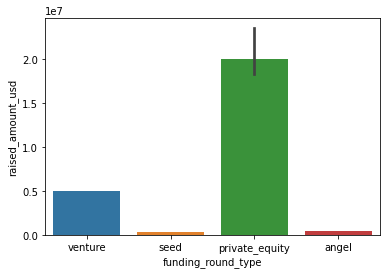

In [65]:
#Plot showing the representative amount of investment in each funding type
sns.barplot(data=plot_df, x='funding_round_type', y='raised_amount_usd', estimator=np.median)

<AxesSubplot:xlabel='country_code', ylabel='raised_amount_usd'>

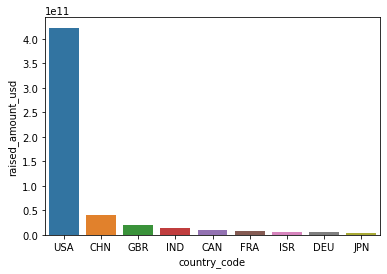

In [66]:
#Plot for top 9 countries against the total amount of investments for chosen Funding type
top9.reset_index(level=0, inplace=True)
sns.barplot(data=top9, x='country_code', y='raised_amount_usd', estimator=np.sum)

In [67]:
#Creating new data frame to get values of top 3 sectors for the top 3 countries in one data frame

In [68]:
D1_new=(D1['main_sector'].value_counts().head(3)).to_frame()
D1_new.reset_index(level=0, inplace=True)
D1_new['country_code']='USA'
D1_new.rename(columns = {"main_sector": "investment_count", "index": "main_sector"}, inplace = True)
D1_new.head()

,main_sector,investment_count,country_code
0,Others,2923,USA
1,Cleantech / Semiconductors,2297,USA
2,"Social, Finance, Analytics, Advertising",1912,USA


In [69]:
D2_new=(D2['main_sector'].value_counts().head(3)).to_frame()
D2_new.reset_index(level=0, inplace=True)
D2_new['country_code']='GBR'
D2_new.rename(columns = {"main_sector": "investment_count", "index": "main_sector"}, inplace = True)
D2_new.head()

,main_sector,investment_count,country_code
0,Others,143,GBR
1,Cleantech / Semiconductors,127,GBR
2,"Social, Finance, Analytics, Advertising",98,GBR


In [70]:
D3_new=(D3['main_sector'].value_counts().head(3)).to_frame()
D3_new.reset_index(level=0, inplace=True)
D3_new['country_code']='IND'
D3_new.rename(columns = {"main_sector": "investment_count", "index": "main_sector"}, inplace = True)
D3_new.head()

,main_sector,investment_count,country_code
0,Others,109,IND
1,"News, Search and Messaging",52,IND
2,Entertainment,33,IND


In [71]:
#Concatenating the sector data for the 3 countries in one dataframe
countryVsector = pd.concat([D1_new, D2_new, D3_new], ignore_index=True)
countryVsector

,main_sector,investment_count,country_code
0,Others,2923,USA
1,Cleantech / Semiconductors,2297,USA
2,"Social, Finance, Analytics, Advertising",1912,USA
3,Others,143,GBR
4,Cleantech / Semiconductors,127,GBR
5,"Social, Finance, Analytics, Advertising",98,GBR
6,Others,109,IND
7,"News, Search and Messaging",52,IND
8,Entertainment,33,IND


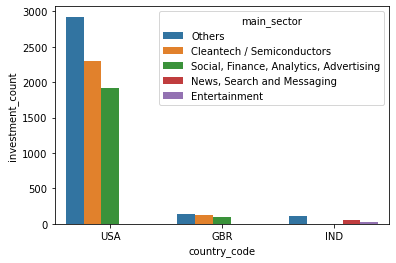

In [72]:
sns.barplot(data=countryVsector, x='country_code', y='investment_count', hue="main_sector")
plt.show()